In [3]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [8]:
#데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
#reshape작업하는 것은 기존의 값에 1 scale추가해줌
x_train = x_train.reshape(x_train.shape[0], 28,28,1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], 28,28,1).astype('float32')/255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [11]:
#컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [13]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
#모델 최적화 설정
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,
                              monitor='val_loss',
                              verbose=1,#저장되는 시점에서는 찍을것
                              save_best_only=True)
#val_loss: 검증용 데이터의 로스값
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [15]:
#모델의 실행모델의 실행
history = model.fit(x_train, y_train,
                   validation_data=(x_test, y_test),
                   epochs=30, batch_size=200, verbose=0,#여기서는 안찍힐것
                   callbacks=[early_stopping, checkpointer])


Epoch 00001: val_loss improved from inf to 0.05475, saving model to ./model\01-0.0547.hdf5

Epoch 00002: val_loss improved from 0.05475 to 0.03978, saving model to ./model\02-0.0398.hdf5

Epoch 00003: val_loss improved from 0.03978 to 0.03665, saving model to ./model\03-0.0366.hdf5

Epoch 00004: val_loss improved from 0.03665 to 0.03061, saving model to ./model\04-0.0306.hdf5

Epoch 00005: val_loss did not improve from 0.03061

Epoch 00006: val_loss improved from 0.03061 to 0.02842, saving model to ./model\06-0.0284.hdf5

Epoch 00007: val_loss did not improve from 0.02842

Epoch 00008: val_loss did not improve from 0.02842

Epoch 00009: val_loss did not improve from 0.02842

Epoch 00010: val_loss did not improve from 0.02842

Epoch 00011: val_loss did not improve from 0.02842

Epoch 00012: val_loss improved from 0.02842 to 0.02780, saving model to ./model\12-0.0278.hdf5

Epoch 00013: val_loss improved from 0.02780 to 0.02762, saving model to ./model\13-0.0276.hdf5

Epoch 00014: val_lo

In [16]:
#테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

313/313 [==============================] - 2s 4ms/step - loss: 0.0296 - accuracy: 0.9921

 Test Accuracy: 0.9921


In [18]:
#테스트 셋의 오차
y_vloss=history.history['val_loss']

In [19]:
#학습셋의 오차
y_loss = history.history['loss']

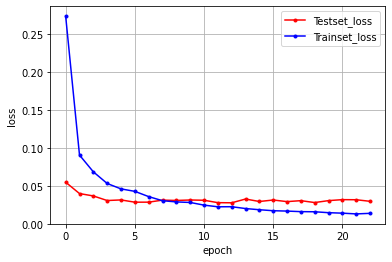

In [20]:
#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()